![](https://storage.googleapis.com/kaggle-datasets-images/1379/2485/a52db2794593657403a4235bfc4147aa/dataset-cover.jpg)

# Step2 - Regression

### Ames House Prices: Advanced Regression Techniques(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

#### Study Regression with 'Boston Housing' Dataset and 'Ames House  Prices' Dataset

# Learning Plan

#### 이 과정을 통해서 배울 수 있는 것은 아래와 같습니다.
- 첫째, Regression을 이용한 데이터 분석의 전체 Workflow
- 둘째, ML - Regression 알고리즘

### Lesson 2-1: Overview - Regression

### Lesson 2-2: EDA

### Lesson 2-3: Preprocessing

### Lesson 2-4: Model Selection

### Lesson 2-5: Model Evaluation & Prediction


# Reference 

- '파이썬 머신러닝 완벽가이드' by 권철민: https://wikibook.co.kr/ml-definitive-guide/
- Stacked Regressions : Top 4% on LeaderBoard by [Serigne](https://www.kaggle.com/serigne) : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

# Lesson 2-1: Overview - Regression

### Boston Housing: Predicting Boston Housing Prices(https://www.kaggle.com/samratp/boston-housing-prices-evaluation-validation)

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

In [2]:
import pandas as pd
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.25)

In [4]:
RM_mean = train_data.RM.mean()
RM_std = train_data.RM.std()

MEDV_mean = train_data.MEDV.mean()
MEDV_std = train_data.MEDV.std()

processed_data = (train_data
                  .assign(RM_standard = lambda x: (x.RM - RM_mean)/RM_std)
                  .assign(MEDV_standard = lambda x: (x.MEDV - MEDV_mean)/MEDV_std)
                 )
processed_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_standard,MEDV_standard
444,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79,10.8,-0.606714,-1.293767
467,4.42228,0.0,18.10,0.0,0.584,6.003,94.5,2.5403,24.0,666.0,20.2,331.29,21.32,19.1,-0.395546,-0.394582
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28,19.6,-1.244469,-0.340414
243,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6.0,300.0,16.6,374.71,5.19,23.7,0.157175,0.103762
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8,-1.950251,-0.968760


In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## 2-1-1 : 선형 회귀 (Linear regression)

이 강의에서는 $\theta$를 직접 정하지 않고 머신 러닝 알고리즘을 통해 학습하는 방법을 알아볼 것이다. 이 경우 가장 많이 쓰이는 알고리즘은 선형 회귀(linear regression)이다.

구체적인 한 알고리즘에 대해 설명하고 있지만 이 강의에서 설명하는 모델을 정의하고 학습하는 과정은 일반적인 머신 러닝 모델에 모두 적용된다. 

## Model specification

모델을 정의하는 단계이다. 

### 선형 회귀의 전제


설명변수(explanatory variable)와 목적변수(target variable) 사이에 선형 관계가 있다.
- 독립변수(independent variable) = 설명변수(explanatory variable) = 입력값이나 원인을 나타낸다. 
- 종속변수(dependent variable) = 목적변수(target variable) = 결과값이나 효과를 나타낸다.

> "All models are wrong; some models are useful." - George E. P. Box

### 가정
RM(방의 갯수)와 MEDV(집값) 사이에 선형 관계가 있다

이 예시에서는 RM(방의 갯수)와 MEDV(집값) 사이에 선형 관계가 있다고 가정한다. 즉, RM이 올라갈 수록 MEDV도 일정 비율만큼 상승한다고 가정하는 것이다.

### Notation

* $X$ : input variable, feature
* $y$ : output variable, target variable
* $\theta$ : model parameters

* n : 데이터의 갯수
* m : feature의 갯수
* $x^{(i)}$ : i번째 데이터
* $x^{(i)} = (x^{(i)}_0, x^{(i)}_1, ..., x^{(i)}_m)$
* $\theta = (\theta_0, \theta_1, ... )$

### 가설 (Hypothesis)

가설은 $y$의 예측값을 x의 함수로 표현하는 것이다. 즉, 가설은 다음과 같이 나타낼 수 있다.

$$
\hat{y} = h_\theta(x)
$$

선형 회귀에서 설명변수 하나와 목적변수 사이의 선형 관계를 가정하고, bias가 없다고 가정하면 다음과 같다.

$$
h_\theta (x) = \theta_1x
$$

#### 가설 (Hypothesis) 이해하기

In [6]:
def plot_h(theta_1):
    x = np.linspace(-3, 3)
    y_hat = theta_1 * x
    plt.scatter(x=processed_data.RM_standard, y=processed_data.MEDV_standard)
    plt.plot(x, y_hat, 'r');

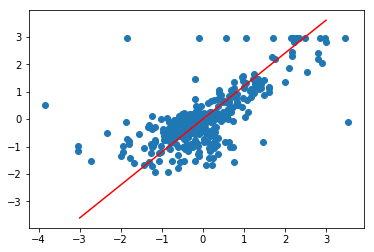

In [7]:
plot_h(1.2)

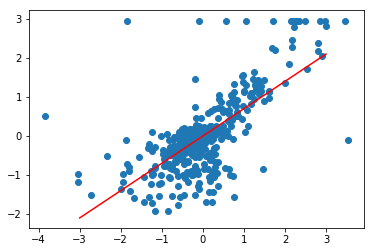

In [8]:
plot_h(0.7)

## Cost function

좋은 $\theta$를 찾기 위해서는, 어떤 $\theta$가 좋은 $\theta$인지 평가할 수 있어야 한다.  Cost function은 모델이 얼마나 틀렸는지를 측정하는 함수이다. Loss function, Object function이라고 불리며 $J(\theta)$로 표기한다.

$$
Cost = J(\theta)
$$

### 선형회귀 문제에서 Cost Function

앞 강의에서 보았듯이 회귀 모델을 평가할 때 널리 쓰이는 방법은 잔차 제곱의 합(RSS : Residual Sum of Squares)이다.

#### 가설 (Hypothesis)

$$
\hat{y}^{(i)} = h_\theta(x^{(i)}) = \theta_1x^{(i)}
$$

#### 매개변수 (Parameter) 

$$
\theta_1
$$

#### 편차

$$
\hat{y}^{(i)} - y^{(i)}
$$

#### Cost function (MSE)

$$
J(\theta) = \frac{1}{2n}\sum^n_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

예컨대, $\theta_1$이 1.2와 0.7일 때 RSS는 다음과 같다.

In [9]:
def RSS(theta_1):
    y_hat = theta_1 * processed_data.RM_standard
    residual = processed_data.MEDV_standard - y_hat
    n = len(residual)
    rss = 1/(2*n) * (residual ** 2).sum()
    return rss

In [10]:
RSS(1.2)

0.3642814897219545

In [11]:
RSS(0.7)

0.2457429182568922

즉, $\theta_1 = 0.7$일 때 $\theta_1 = 1.2$일 때 보다 조금 더 낫다는 것을 알 수 있다.

### $h_\theta(x)$와 $J(\theta)$의 차이

$h_\theta(x)$의 함수값은 $\theta$가 고정되어 있고 $x$ 따라 변한다. 이에 비해 $J(\theta)$는 $x$와 $y$가 주어진 데이터로 고정되어 있고 $\theta$에 따라 값이 변한다. 

### $J(\theta)$의 그래프

$\theta$에 따라 변하는 $J(\theta)$의 그래프를 그려보면 다음과 같다.

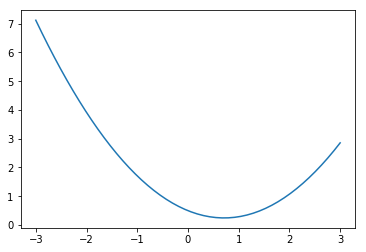

In [12]:
thetas = np.linspace(-3, 3)
plt.plot(thetas, [RSS(theta) for theta in thetas]);

0.7 ~ 0.8 사이에서 최솟값이 있다는 것을 알 수 있다.

## Training

### 경사 하강법 (Gradient Descent)

$J(\theta)$를 극소화하는 $\theta$를 자동으로 찾아주는 알고리즘이 경사 하강법 (Gradient Descent)이다. 

$$
\theta_j := \theta_j - \alpha{\partial\over\partial\theta_j}J(\theta)
$$

* $\alpha$ : 학습 속도 (learning rate)
* ${\partial\over\partial\theta_j}J(\theta)$ : 기울기 (derivative)

#### $\alpha$의 의미

$\alpha$는 학습 속도 (learning rate)라고 불리며 경사 하강법의 하강 속도를 조절하는 역할을 한다. 이 값은 분석가가 직접 지정해주는 hyperparameter이다.

* $\alpha$가 너무 클 때 : 경사 하강법이 수렴하지 못하고 발산하거나 진동한다.

* $\alpha$가 너무 작을 때 : 경사 하강법이 수렴하는 데 너무 긴 시간이 걸린다.

#### 극소점 (Local minimum)에 빠질 위험

경사 하강법은 최솟값을 찾는 절대적인 알고리즘은 아니다. 최솟값이 아닌 극소점 (local minimum), 즉 주변보다는 낮지만 가장 낮은 값은 아닌 지점에 빠질 위험이 있다.



![local minimum](https://files.slack.com/files-pri/T25783BPY-F5YFG1S8N/screenshot.png?pub_secret=7d691ade3a)

#### 선형 회귀를 위한 경사 하강법 (Gradient descent for linear regression)

$$
h_\theta(x) = \theta_1x
$$

$$
J(\theta) = J(\theta_1) = \frac{1}{2n}\sum^n_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2 = \frac{1}{2n}\sum^n_{i=1} (\theta_1x^{(i)} - y^{(i)})^2
$$

$$
{\partial\over\partial\theta_1}J(\theta_1) = \frac{1}{n}\sum^n_{i=1} (\theta_1x^{(i)} - y^{(i)})x^{(i)}
$$

$$
\theta_1 := \theta_1 - \alpha{\partial\over\partial\theta_j}J(\theta) = \theta_1 - \alpha\frac{1}{n}\sum^n_{i=1} (\theta_1x^{(i)} - y^{(i)})x^{(i)}
$$

##### In code

In [13]:
x = processed_data.RM_standard
y = processed_data.MEDV_standard
n = len(x)
alpha = 0.3
theta_1 = initial_theta_1 = -0.2

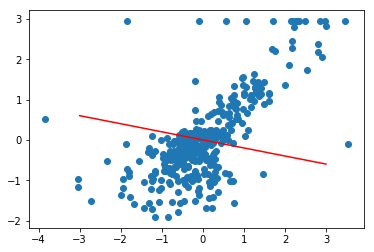

In [14]:
plot_h(theta_1)

theta_1 : 0.07296656688349545 Cost : 0.6607112204904922 gradient : -0.9098885562783182


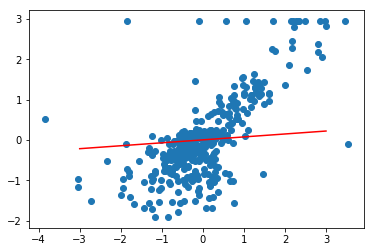

theta_1 : 0.2642592322245414 Cost : 0.449499139216658 gradient : -0.6376422178034865


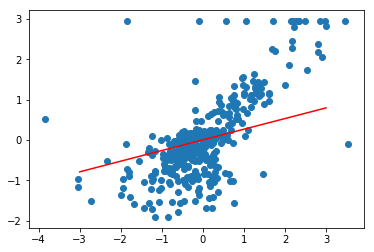

theta_1 : 0.3983155169595858 Cost : 0.34577102617338096 gradient : -0.44685428245014785


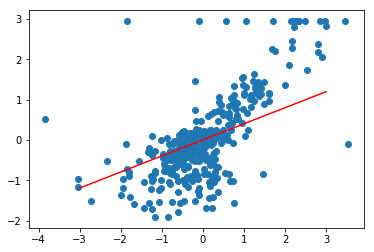

theta_1 : 0.49226102942826067 Cost : 0.294829236429975 gradient : -0.31315170822891625


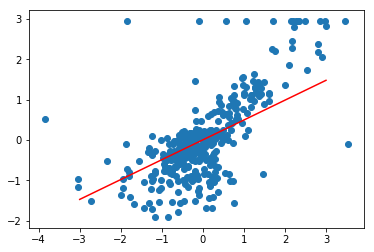

theta_1 : 0.5580972513588149 Cost : 0.26981127489452617 gradient : -0.21945407310184747


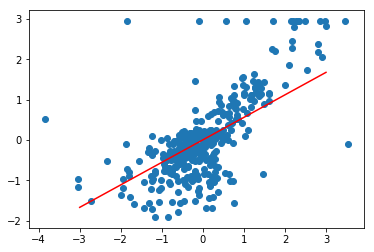

theta_1 : 0.6042347198146334 Cost : 0.2575247336767588 gradient : -0.1537915615193949


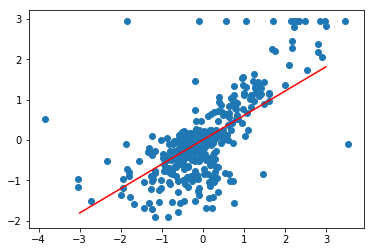

theta_1 : 0.6365674681572862 Cost : 0.25149070508965765 gradient : -0.10777582780884248


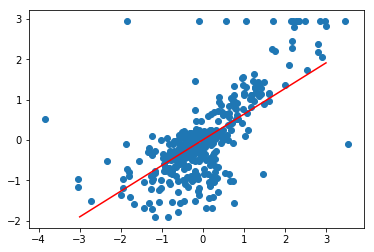

theta_1 : 0.6592259852016359 Cost : 0.24852734051498765 gradient : -0.07552839014783261


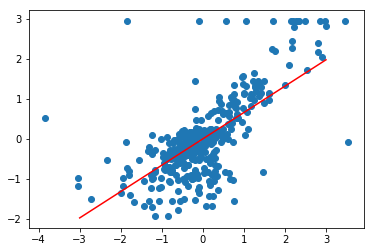

theta_1 : 0.675104882634299 Cost : 0.2470720060770334 gradient : -0.05292965810887695


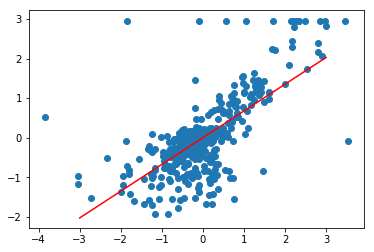

theta_1 : 0.6862326798852629 Cost : 0.2463572785189058 gradient : -0.03709265750321293


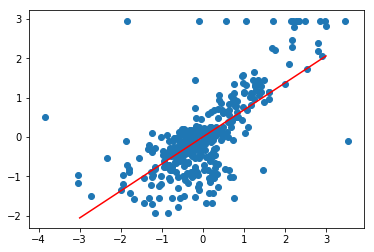

theta_1 : 0.6940309462437221 Cost : 0.2460062695212316 gradient : -0.025994221194863706


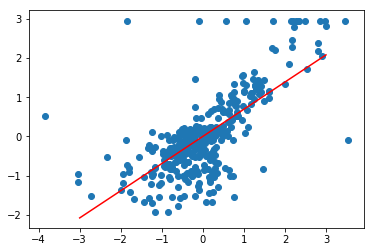

theta_1 : 0.6994959054648481 Cost : 0.24583388591149508 gradient : -0.01821653073708648


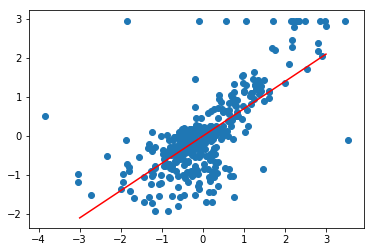

theta_1 : 0.7033257027448773 Cost : 0.24574922680274655 gradient : -0.012765990933430504


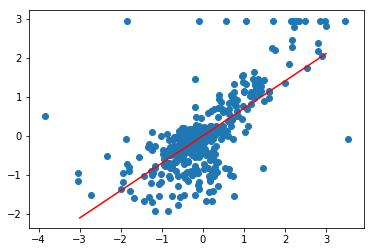

theta_1 : 0.7060095923427024 Cost : 0.24570764996893363 gradient : -0.008946298659417236


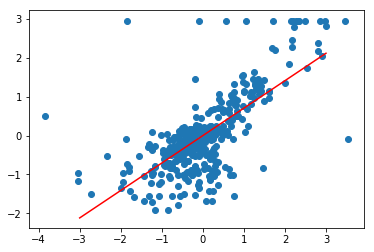

theta_1 : 0.707890439512049 Cost : 0.24568723121972322 gradient : -0.0062694905644886815


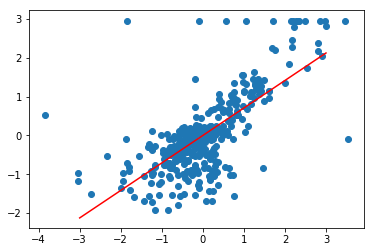

theta_1 : 0.7092085213278233 Cost : 0.2456772033921789 gradient : -0.004393606052581033


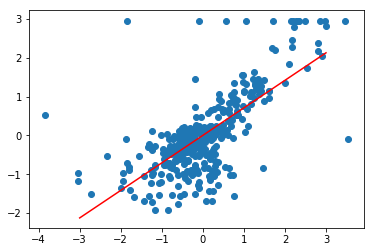

theta_1 : 0.7101322219353949 Cost : 0.245672278637767 gradient : -0.003079002025238853


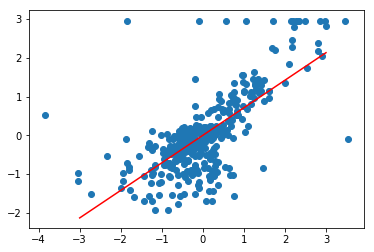

theta_1 : 0.7107795435221259 Cost : 0.24566986004750802 gradient : -0.00215773862243653


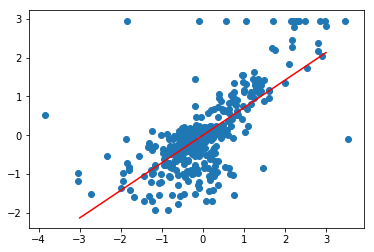

theta_1 : 0.7112331810245949 Cost : 0.24566867225653377 gradient : -0.0015121250082299204


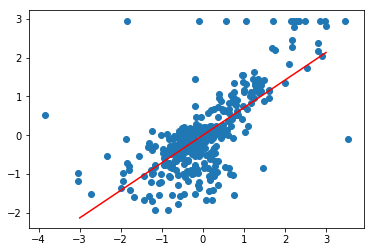

theta_1 : 0.7115510863561404 Cost : 0.24566808892192668 gradient : -0.0010596844384851351


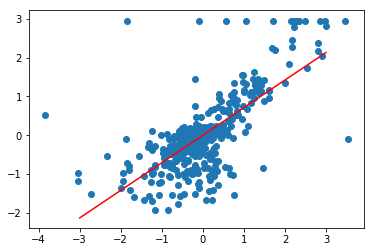

In [15]:
costs = []
iterations = []
for i in range(20):
    y_hat = theta_1 * x
    residual = y_hat - y

    cost = (residual ** 2).sum()/(2*n)

    gradient = 1/n * (residual*x).sum()

    theta_1 -= alpha * gradient
    
    print('theta_1 :', theta_1, 'Cost :', cost, 'gradient :', gradient)
    plot_h(theta_1)
    plt.show()
    
    iterations.append(i)
    costs.append(cost)

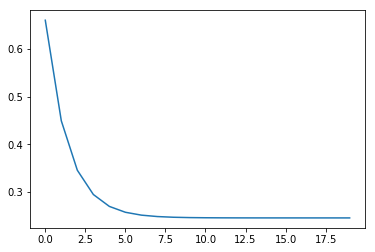

In [16]:
plt.plot(iterations, costs)

#### Normal Equation

ref :  https://daeson.tistory.com/172

$$
\theta = (X^TX)^{-1}X^Ty
$$

* 역행렬 (inverse matrix) 연산은 느리다.
* $(X^TX)$의 역행렬이 존재하지 않을 수 있다.
  * 쓸모 없는 (선형종속인) 변수들
  * 변수들이 너무 많을 때 ($n < m$)

# Lesson 2-2: EDA

## 2-2-1 : 문제 정의하기

### 아이오와 주 에임스(Ames)에 있는 주거용 주택을 설명하는 79가지 변수로 각 주택의 최종 가격을 예측합니다.

## 2-2-2 : 훈련, 테스트 데이터 확인하기

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./data/ames_house_prices"]).decode("utf8")) #check the files available in the directory

data_description.txt
test.csv
train.csv



In [18]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('./data/ames_house_prices/train.csv')
test = pd.read_csv('./data/ames_house_prices/test.csv')

In [19]:
##display the first five rows of the train dataset.
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
##display the first five rows of the test dataset.
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [21]:
#explore data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [22]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [23]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Lesson 2-3: Preprocessing

## 2-3-1 : Outliers

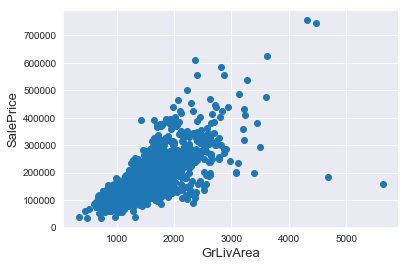

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### <관측 결과>

Training 데이터의 GrLivArea 중 오른쪽 하단에 이상치(outlier) 2개를 볼 수 있습니다. 삭제합니다.

Training 데이터의 이상치를 삭제하는 것은 안전합니다. 하지만 Test 데이터의 이상치를 삭제하는 것은 모델에 악영향을 줄 수 있습니다.

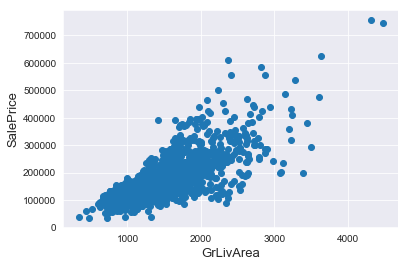

In [25]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 2-3-2 : Target Variable

**SalePrice** 는 예측해야할 변수입니다.


 mu = 180932.92 and sigma = 79467.79



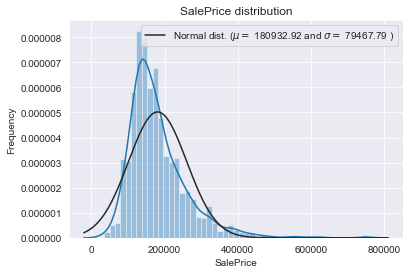

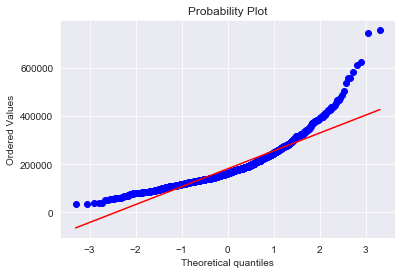

In [26]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### <관츨 결과>

**SalePrice** 가 우편향되어 있습니다. 일반적으로 모델은 편향되지 않은 Normal Distribution이 좋습니다. **SalePrice** 분포를 변형합니다.

### Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



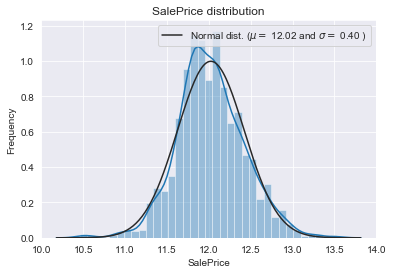

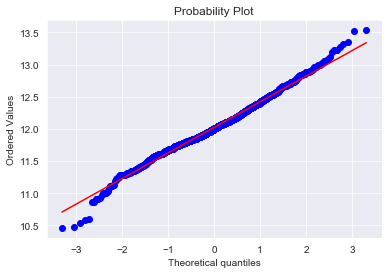

In [27]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## 2-3-3 : Features Engineering

### 2-3-3-1 Missing Data

먼저 동일한 DataFrame에 Training 데이터와 Test 데이터를 Concatenate 합니다.

In [28]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


### Missing Data

In [29]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

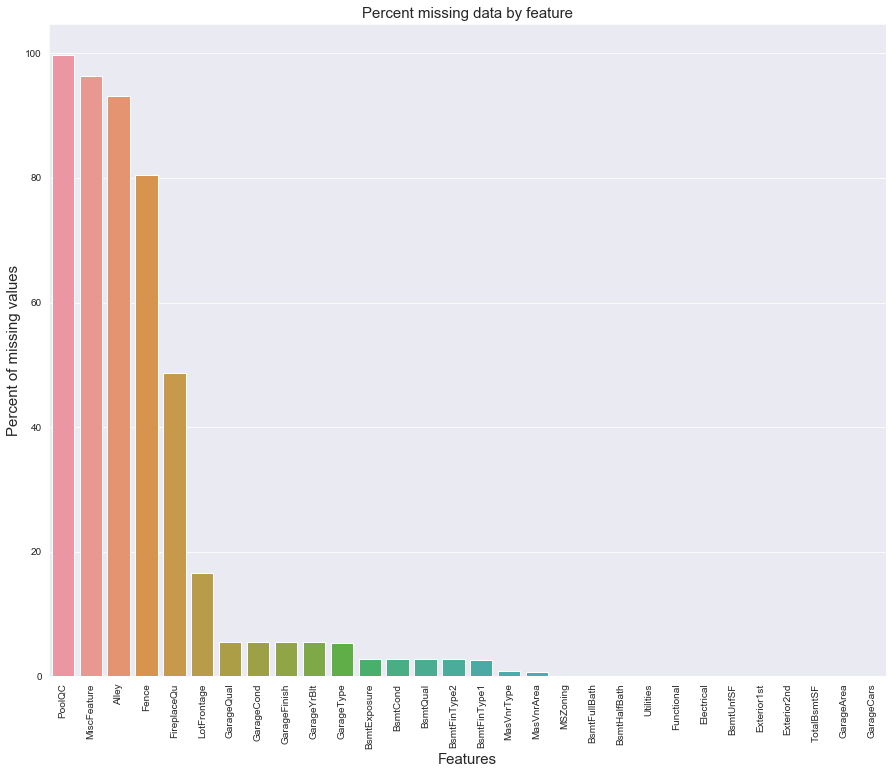

In [30]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Data Correlation

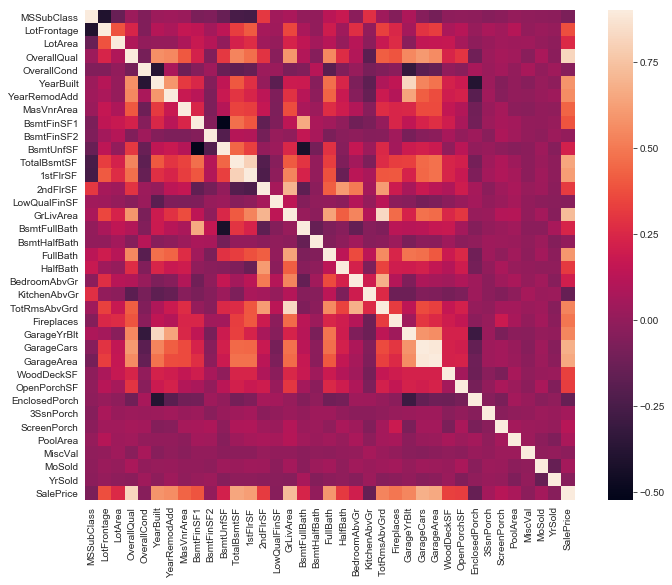

In [31]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### missing values 처리하기

### PoolQC

data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [32]:
all_data["PoolQC"].value_counts()

Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64

In [33]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [34]:
all_data["PoolQC"].value_counts()

None    2908
Ex         4
Gd         3
Fa         2
Name: PoolQC, dtype: int64

### MiscFeature

data description says NA means "no misc feature"

In [35]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

### Alley 

data description says NA means "no alley access"

In [36]:
all_data["Alley"] = all_data["Alley"].fillna("None")

### Fence

data description says NA means "no fence"

In [37]:
all_data["Fence"] = all_data["Fence"].fillna("None")

### FireplaceQu

data description says NA means "no fireplace"

In [38]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

### LotFrontage

Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [39]:
all_data["LotFrontage"].describe()

count   2431.000
mean      69.181
std       22.792
min       21.000
25%       59.000
50%       68.000
75%       80.000
max      313.000
Name: LotFrontage, dtype: float64

In [40]:
all_data["LotFrontage"].fillna(all_data.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)

### GarageType, GarageFinish, GarageQual and GarageCond

Replacing missing data with None

In [41]:
all_data[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003.000,Attchd,2.000,548.000,TA,TA,RFn
1,1976.000,Attchd,2.000,460.000,TA,TA,RFn
2,2001.000,Attchd,2.000,608.000,TA,TA,RFn
3,1998.000,Detchd,3.000,642.000,TA,TA,Unf
4,2000.000,Attchd,3.000,836.000,TA,TA,RFn


In [42]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

### GarageYrBlt, GarageArea and GarageCars

Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [43]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath

missing values are likely zero for having no basement

In [44]:
all_data[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head() 

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,Unf,No,GLQ,TA,Gd,1.000,0.000,856.000,706.000,0.000,150.000
1,Unf,Gd,ALQ,TA,Gd,0.000,1.000,1262.000,978.000,0.000,284.000
2,Unf,Mn,GLQ,TA,Gd,1.000,0.000,920.000,486.000,0.000,434.000
3,Unf,No,ALQ,Gd,TA,1.000,0.000,756.000,216.000,0.000,540.000
4,Unf,Av,GLQ,TA,Gd,1.000,0.000,1145.000,655.000,0.000,490.000


In [45]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2

For all these categorical basement-related features, NaN means that there is no basement.

In [46]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

### MasVnrArea and MasVnrType

NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [47]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

### MSZoning (The general zoning classification) 

'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [48]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [49]:
all_data['MSZoning'] = all_data['MSZoning'].fillna("RL")

### Utilities

For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [50]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [51]:
all_data = all_data.drop(['Utilities'], axis=1)

### Functional

data description says NA means typical

In [52]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

### Electrical

It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [53]:
all_data['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [54]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

### KitchenQual

Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [55]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [56]:
all_data['KitchenQual'].mode()[0]

'TA'

In [57]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

### Exterior1st and Exterior2nd

Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [58]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

### SaleType

Fill in again with most frequent which is "WD"

In [59]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

### MSSubClass

Na most likely means No building class. We can replace missing values with None

In [60]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### Check remaining missing values if any 

In [61]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [62]:
all_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,Normal,WD,0,Pave,8,856.000,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,Normal,WD,0,Pave,6,1262.000,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,Normal,WD,0,Pave,6,920.000,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,Abnorml,WD,0,Pave,7,756.000,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,Normal,WD,0,Pave,9,1145.000,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.000,0.000,...,Normal,WD,0,Pave,5,796.000,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.000,0.000,...,Normal,WD,0,Pave,7,1686.000,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.000,32.000,...,Normal,WD,0,Pave,7,1107.000,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.000,0.000,...,Abnorml,WD,0,Pave,8,952.000,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.000,0.000,...,Normal,WD,0,Pave,5,991.000,0,1939,1950,2008


In [63]:
all_data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,...,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000,2917.000
mean,1157.692,335.862,2.604,2.860,438.865,49.599,0.429,0.061,560.504,23.114,...,5.565,6.086,2.089,16.073,6.448,1048.968,93.629,1971.288,1984.248,2007.793
std,385.264,428.120,25.197,0.823,444.181,169.232,0.524,0.246,439.699,64.263,...,1.113,1.407,34.561,56.202,1.564,429.472,126.533,30.287,20.892,1.315
min,334.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,1.000,0.000,0.000,2.000,0.000,0.000,1872.000,1950.000,2006.000
25%,876.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,220.000,0.000,...,5.000,5.000,0.000,0.000,5.000,793.000,0.000,1953.000,1965.000,2007.000
50%,1082.000,0.000,0.000,3.000,368.000,0.000,0.000,0.000,467.000,0.000,...,5.000,6.000,0.000,0.000,6.000,988.000,0.000,1973.000,1993.000,2008.000
75%,1384.000,704.000,0.000,3.000,733.000,0.000,1.000,0.000,804.000,0.000,...,6.000,7.000,0.000,0.000,7.000,1302.000,168.000,2001.000,2004.000,2009.000
max,5095.000,2065.000,508.000,8.000,4010.000,1526.000,3.000,2.000,2336.000,1012.000,...,9.000,10.000,800.000,576.000,15.000,5095.000,1424.000,2010.000,2010.000,2010.000


### 2-3-3-2 Transforming some numerical variables to categorical

Remember...categorical data has no order.

In [64]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### 2-3-3-3 Transforming some categorical variables to numerical

Label Encoding some categorical variables that may contain information in their ordering set

The danger in label encoding is that your machine learning algorithm may learn to favor a over b.

The common solution for encoding nominal data is one-hot encoding.(dummy val)

In [65]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


### 2-3-3-4 Normalizeing skewd features

#### Check skewed features

In [66]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [67]:
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


#### Box-Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x

Note that setting  λ=0 is equivalent to log1p used above for the target variable.

See this [page](http://onlinestatbook.com/2/transformations/box-cox.html) for more details on Box Cox Transformation as well as the [scipy function's page](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html)

In [68]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 58 skewed numerical features to Box Cox transform


### 2-3-3-5 Scaling features

if need scaling, we can also use minmax scaler

In [69]:
#from sklearn.preprocessing import minmax_scale

#df['col_name']= minmax_scale(df['col_name'], axis=0, copy=True)

we don't need scaling because of the we did log

In [70]:
all_data[numeric_feats].std()

1stFlrSF        0.920
2ndFlrSF        5.633
3SsnPorch       0.899
Alley           0.166
BedroomAbvGr    0.273
BsmtCond        0.403
BsmtExposure    0.560
BsmtFinSF1      5.123
BsmtFinSF2      3.058
BsmtFinType1    0.778
BsmtFinType2    0.405
BsmtFullBath    0.372
BsmtHalfBath    0.177
BsmtQual        0.529
BsmtUnfSF       3.408
CentralAir      0.183
EnclosedPorch   2.645
ExterCond       0.268
ExterQual       0.317
Fence           0.435
FireplaceQu     0.370
Fireplaces      0.422
FullBath        0.252
Functional      0.276
GarageArea      2.472
GarageCars      0.364
GarageCond      0.250
GarageFinish    0.619
GarageQual      0.301
GarageYrBlt     3.213
GrLivArea       0.961
HalfBath        0.361
HeatingQC       0.811
KitchenAbvGr    0.101
KitchenQual     0.399
LandSlope       0.171
LotArea         1.969
LotFrontage     0.602
LotShape        0.721
LowQualFinSF    1.055
MSSubClass      0.795
MasVnrArea      4.112
MiscVal         2.206
MoSold          0.746
OpenPorchSF     3.111
OverallCon

### 2-3-3-6 Add/Drop more features

### Check Correlation

In [71]:
corr = train.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice', ascending=False)['SalePrice']
corr 

OverallQual      0.821
GrLivArea        0.725
GarageCars       0.681
GarageArea       0.656
TotalBsmtSF      0.648
1stFlrSF         0.621
FullBath         0.596
YearBuilt        0.587
YearRemodAdd     0.566
GarageYrBlt      0.542
TotRmsAbvGrd     0.538
Fireplaces       0.492
MasVnrArea       0.435
BsmtFinSF1       0.392
LotFrontage      0.373
WoodDeckSF       0.334
OpenPorchSF      0.325
2ndFlrSF         0.320
HalfBath         0.314
LotArea          0.261
BsmtFullBath     0.237
BsmtUnfSF        0.222
BedroomAbvGr     0.209
ScreenPorch      0.121
PoolArea         0.074
MoSold           0.057
3SsnPorch        0.055
BsmtFinSF2       0.005
BsmtHalfBath    -0.005
MiscVal         -0.020
OverallCond     -0.037
YrSold          -0.037
LowQualFinSF    -0.038
MSSubClass      -0.074
KitchenAbvGr    -0.148
EnclosedPorch   -0.149
Name: SalePrice, dtype: float64

### we better delete correlation range from -0.1 ~ 0.1 

In [72]:
all_data.drop('PoolArea', axis=1, inplace=True)
all_data.drop('MoSold', axis=1, inplace=True)
all_data.drop('3SsnPorch', axis=1, inplace=True)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)
all_data.drop('BsmtHalfBath', axis=1, inplace=True)
all_data.drop('MiscVal', axis=1, inplace=True)
all_data.drop('LowQualFinSF', axis=1, inplace=True)
all_data.drop('YrSold', axis=1, inplace=True)
all_data.drop('OverallCond', axis=1, inplace=True)
all_data.drop('MSSubClass', axis=1, inplace=True)

In [73]:
all_data.shape #check deleted 10 cols

(2917, 68)

### Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [74]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
print(all_data.shape)

(2917, 69)


### Getting dummy categorical features

In [75]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 210)


### Getting the new train and test sets.

In [76]:
#Split train/test set
train = all_data[:ntrain]
test = all_data[ntrain:]

# Lesson 2-4: Model Selection

## 2-4-1 : Import libratries

In [77]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## 2-4-2 : Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribute, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [78]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 2-4-3 : Making Base Regression Model

### 2-4-3-1 : LASSO Regression 
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [79]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

### 2-4-3-2 : Elastic Net Regression
again made robust to outliers

In [80]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

### 2-4-3-3 : Kernel Ridge Regression

In [81]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

### 2-4-3-4 : Gradient Boosting Regression
With huber loss that makes it robust to outliers

In [82]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### 2-4-3-5 : XGBoost

In [90]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### 2-4-3-6 : LightGBM

In [84]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# Lesson 2-5: Model Evaluation & Prediction

## 2-5-1 : Base model Evaluation

Let's see how these base models perform on the data by evaluating the cross-validation **rmsle** error

### 2-5-1-1 : LASSO Regression 

In [85]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1172 (0.0076)



### 2-5-1-2 : Elastic Net Regression

In [86]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1172 (0.0077)



### 2-5-1-3 : Kernel Ridge Regression

In [87]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1211 (0.0078)



### 2-5-1-4 : Gradient Boosting Regression

In [88]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1224 (0.0076)



### 2-5-1-5 : XGBoost

In [91]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1207 (0.0061)



### 2-5-1-6 : LightGBM

In [92]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1203 (0.0055)



## 2-5-2 : Ensembling

앙상블(Ensemble) 학습은 여러 개의 학습 알고리즘을 사용하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법입니다. 하나의 강한 머신러닝 알고리즘보다 여러 개의 약한 머신러닝 알고리즘이 낫다 라는 아이디어를 가지고 이해하면 좋습니다.
이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있습니다.
문제와 데이터에 따라 단일 모델의 성능이 더 좋은 경우도 있습니다. 하지만 앙상블 기법을 사용하면 더 유연성있는 모델을 만들며 더 좋은 예측 결과를 기대할 수 있습니다.
Regression에서 앙상블 학습의 유형은 가장 많이 알려진 Averaging, Stacking 등이 있으며, 그 외에도 다양한 앙상블 학습의 유형이 연구되고 있습니다.

1) Averaging

2) Stacking

### 2-5-2-1 : Averaging

에버리징(Averaging)은 가장 쉬운 앙상블 기법입니다. 서로 다른 알고리즘을 가진 Regression 모델를 결합하는 방식입니다.

1. Simple Averaging

    회귀 문제에서 사용하는 방법으로, 각 예측값을 평균내어 사용합니다. 이 방법은 경우에 따라 과대적합을 줄여주고, 더 부드러운 회귀모델을 만들어줍니다.
    

2. Weighted Averaging

    위에서 평균을 낼 때, 각 모델별 가중치를 두어 평균내는 방식입니다.

#### Averaged base models class

In [93]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

#### Averaged base models score
We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [94]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1142 (0.0074)



#### It seems even the averaging approach really improve the score.

### 2-5-2-2 : Stacking

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

Split the total training set into two disjoint sets (here train and .holdout )

Train several base models on the first part (train)

Test these base models on the second part (holdout)

Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

![Stacking](http://i.imgur.com/QBuDOjs.jpg)

from [Faron](https://www.kaggle.com/getting-started/18153#post103381)

other reference : [KazAnova's interview](http://blog.kaggle.com/2017/06/15/stacking-made-easy-an-introduction-to-stacknet-by-competitions-grandmaster-marios-michailidis-kazanova/)

On this gif, the base models are algorithms 0, 1, 2 and the meta-model is algorithm 3. The entire training dataset is A+B (target variable y known) that we can split into train part (A) and holdout part (B). And the test dataset is C.

B1 (which is the prediction from the holdout part) is the new feature used to train the meta-model 3 and C1 (which is the prediction from the test dataset) is the meta-feature on which the final prediction is done.

#### Stacking averaged Models Class

In [95]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

#### Stacking Averaged models Score

To make the two approaches comparable (by using the same number of models) , we just average Enet KRR and Gboost, then we add lasso as meta-model.

In [96]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1141 (0.0072)


#### We get again a better score by stacking approach.

### 2-5-2-3 : Ensembling StackedRegressor, XGBoost and LightGBM

We add XGBoost and LightGBM to the StackedRegressor defined previously.

#### Define rmsle evalution fuction

In [97]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#### StackedRegressor Training

In [98]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.08280455767256527


#### XGBoost Training

In [99]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08136603761705513


#### LightGBM Training

In [100]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07712779216682149


#### RMSLE on the entire Train data when averaging

In [101]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07970002244907942


## 2-5-3 : Prediction

### Ensemble prediction

In [102]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

### Making Prediction Result into CSV File

In [103]:
result = pd.DataFrame()
result['Id'] = test_ID
result['SalePrice'] = ensemble
result.to_csv('./data/ames_house_prices/result.csv',index=False)